# Example 01: General Use of XGBoostFeatureSelector
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slickml/slick-ml/blob/master/examples/feature_selection/example_01_XGBoostFeatureSelector.ipynb)

### Google Colab Configuration

In [1]:
# !git clone https://github.com/slickml/slick-ml.git
# %cd slick-ml
# !pip install -r requirements.txt

### Local Environment Configuration

In [2]:
# Change path to project root
%cd ../..

/Users/atahmassebi/Desktop/AmirStuff/GitHub/slick-ml


### Import Python Libraries

In [3]:
%load_ext autoreload

# widen the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
%autoreload
from slickml.feature_selection import XGBoostFeatureSelector

_______
# XGBoostFeatureSelector Docstring

In [5]:
help(XGBoostFeatureSelector)

Help on class XGBoostFeatureSelector in module slickml.feature_selection:

class XGBoostFeatureSelector(builtins.object)
 |  XGBoostFeatureSelector(n_iter=None, num_boost_round=None, n_splits=None, metrics=None, early_stopping_rounds=None, random_state=None, stratified=True, shuffle=True, sparse_matrix=False, nth_noise_threshold=None, show_stdv=False, importance_type=None, params=None, verbose_eval=False, callbacks=False)
 |  
 |  XGBoost Feature Selector.
 |  This is wrapper using XGBoost classifier to run xgboost.cv()
 |  model with n-folds cross-validation on top of augmented data
 |  with noisy features iteratively. At each n-fold CV of each iteration,
 |  it finds the best boosting round to overcome the over-fitting and
 |  run xgboost.train(). Main reference is XGBoost Python API:
 |  (https://xgboost.readthedocs.io/en/latest/python/python_api.html)
 |  
 |  Parameters
 |  ----------
 |  n_iter: int, optional (default=3)
 |      Number of iteration for feature selection
 |  
 |  

## Example 1

In [6]:
# loading data
df = pd.read_csv("data/clf_data.csv")
df.head()

,F1,F2,F3,F4,F5,F6,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [7]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [8]:
%autoreload
# setup feature selector object
params={"eval_metric" : "auc",
        "learning_rate" : 0.05,
        "max_depth": 2,
        "min_child_weight" : 1,
        "gamma" : 0.0}

xfs = XGBoostFeatureSelector(n_iter=4,
                             sparse_matrix=True,
                             params=params)

In [9]:
# run feature selection
xfs.fit(X, y)

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Iteration 1 *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
[19:54:07] WARNING: /private/var/folders/sz/fy4q4xhn0t77v6_43v8v2_1m0000gp/T/pip-install-c8kuvb03/xgboost_f6ae073552724e44985aee0fb3d938bd/build/temp.macosx-10.15-x86_64-3.9/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:54:07] WARNING: /private/var/folders/sz/fy4q4xhn0t77v6_43v8v2_1m0000gp/T/pip-install-c8kuvb03/xgboost_f6ae073552724e44985aee0fb3d938bd/build/temp.macosx-10.15-x86_64-3.9/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip thr

[19:54:08] WARNING: /private/var/folders/sz/fy4q4xhn0t77v6_43v8v2_1m0000gp/T/pip-install-c8kuvb03/xgboost_f6ae073552724e44985aee0fb3d938bd/build/temp.macosx-10.15-x86_64-3.9/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


*-*-*-*-*-*-*-*-*-*-*-* Fold = 4/4 -- Train AUC = 0.933 -- Test AUC = 0.886 *-*-*-*-*-*-*-*-*-*-*-*
*-*-* Internal 4-Folds CV: -*-*- Train AUC = 0.944 +/- 0.010 -*-*- Test AUC = 0.844 +/- 0.018 *-*-*
*-*-* External 4-Folds CV: -*-*- Train AUC = 0.933 +/- 0.009 -*-*- Test AUC = 0.848 +/- 0.041 *-*-*

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Iteration 2 *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
[19:54:08] WARNING: /private/var/folders/sz/fy4q4xhn0t77v6_43v8v2_1m0000gp/T/pip-install-c8kuvb03/xgboost_f6ae07

[19:54:09] WARNING: /private/var/folders/sz/fy4q4xhn0t77v6_43v8v2_1m0000gp/T/pip-install-c8kuvb03/xgboost_f6ae073552724e44985aee0fb3d938bd/build/temp.macosx-10.15-x86_64-3.9/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:54:09] WARNING: /private/var/folders/sz/fy4q4xhn0t77v6_43v8v2_1m0000gp/T/pip-install-c8kuvb03/xgboost_f6ae073552724e44985aee0fb3d938bd/build/temp.macosx-10.15-x86_64-3.9/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:54:09] WARNING: /priva

[19:54:10] WARNING: /private/var/folders/sz/fy4q4xhn0t77v6_43v8v2_1m0000gp/T/pip-install-c8kuvb03/xgboost_f6ae073552724e44985aee0fb3d938bd/build/temp.macosx-10.15-x86_64-3.9/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


*-*-*-*-*-*-*-*-*-*-*-* Fold = 3/4 -- Train AUC = 0.928 -- Test AUC = 0.830 *-*-*-*-*-*-*-*-*-*-*-*
[19:54:10] WARNING: /private/var/folders/sz/fy4q4xhn0t77v6_43v8v2_1m0000gp/T/pip-install-c8kuvb03/xgboost_f6ae073552724e44985aee0fb3d938bd/build/temp.macosx-10.15-x86_64-3.9/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip thr

[19:54:10] WARNING: /private/var/folders/sz/fy4q4xhn0t77v6_43v8v2_1m0000gp/T/pip-install-c8kuvb03/xgboost_f6ae073552724e44985aee0fb3d938bd/build/temp.macosx-10.15-x86_64-3.9/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:54:10] WARNING: /private/var/folders/sz/fy4q4xhn0t77v6_43v8v2_1m0000gp/T/pip-install-c8kuvb03/xgboost_f6ae073552724e44985aee0fb3d938bd/build/temp.macosx-10.15-x86_64-3.9/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:54:10] WARNING: /priva

In [10]:
# get feature freq
# or xfs.feature_frequency_ 
xfs.get_feature_frequency()

,Feature,Frequency,Frequency (%)
0,F1,16.0,100.00
1,F2,16.0,100.00
2,F5,16.0,100.00
3,F6,16.0,100.00
4,F3,13.0,81.25
5,F4,1.0,6.25


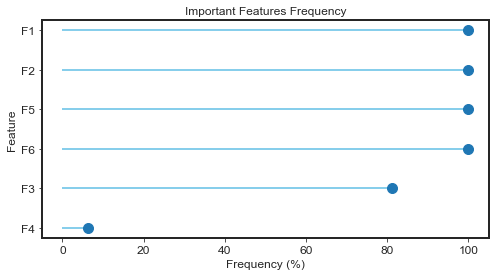

In [11]:
xfs.plot_frequency()

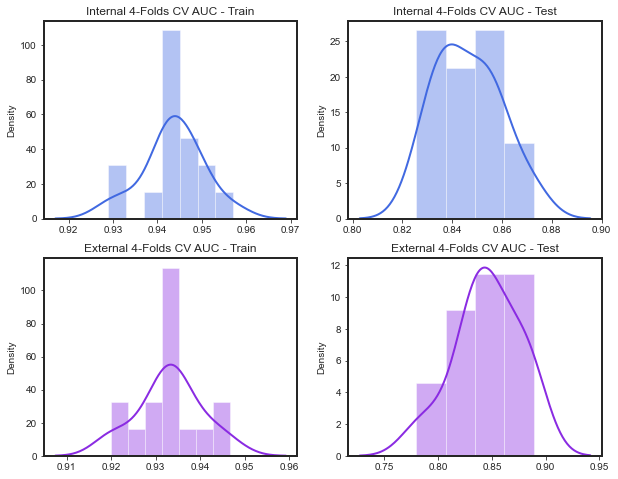

In [12]:
xfs.plot_cv_results()

In [13]:
# getting feature importance for each model
# or imps = xfs.feature_importance_
imps = xfs.get_feature_importance()
for key, val in imps.items():
    print(F"--- {key} ---")
    display(imps[key].head(5))

--- model_iter1_fold1 ---


,feature,total_gain
0,F1,775.621000
1,F6,368.416118
2,F5,289.092714
3,F2,268.819594
4,F3,39.181194


--- model_iter1_fold2 ---


,feature,total_gain
0,F1,810.796494
1,F6,378.348368
2,F2,345.616431
3,F5,307.919239
4,F3,153.421986


--- model_iter1_fold3 ---


,feature,total_gain
0,F1,1225.975448
1,F6,542.110570
2,F2,363.217195
3,F5,327.586607
4,F3,52.197483


--- model_iter1_fold4 ---


,feature,total_gain
0,F1,924.338843
1,F6,457.102568
2,F2,341.251409
3,F5,297.803539
4,noisy_F2,74.472838


--- model_iter2_fold1 ---


,feature,total_gain
0,F1,921.896982
1,F6,465.550841
2,F2,383.865353
3,F5,315.546382
4,noisy_F4,86.040381


--- model_iter2_fold2 ---


,feature,total_gain
0,F1,1052.709545
1,F5,357.687726
2,F6,348.818764
3,F2,262.176146
4,F3,108.966638


--- model_iter2_fold3 ---


,feature,total_gain
0,F1,819.036180
1,F6,535.523851
2,F2,352.202108
3,F5,256.003175
4,F3,79.219764


--- model_iter2_fold4 ---


,feature,total_gain
0,F1,975.628162
1,F6,615.403474
2,F2,422.683926
3,F5,243.941104
4,F3,73.846931


--- model_iter3_fold1 ---


,feature,total_gain
0,F1,804.943877
1,F6,494.119759
2,F2,482.175396
3,F5,329.301203
4,F3,68.335471


--- model_iter3_fold2 ---


,feature,total_gain
0,F1,1005.884172
1,F6,519.026610
2,F5,302.620361
3,F2,262.924007
4,F3,113.681405


--- model_iter3_fold3 ---


,feature,total_gain
0,F1,933.862577
1,F6,489.980032
2,F2,395.745133
3,F5,181.267100
4,noisy_F2,113.329298


--- model_iter3_fold4 ---


,feature,total_gain
0,F1,999.002940
1,F5,456.282595
2,F2,286.812387
3,F6,276.217240
4,F3,96.639700


--- model_iter4_fold1 ---


,feature,total_gain
0,F1,1121.499507
1,F5,475.476629
2,F6,391.058691
3,F2,290.387255
4,F3,52.918682


--- model_iter4_fold2 ---


,feature,total_gain
0,F1,1023.944795
1,F6,439.015926
2,F5,293.347009
3,F2,272.928128
4,F3,145.172713


--- model_iter4_fold3 ---


,feature,total_gain
0,F1,843.233669
1,F6,466.568997
2,F2,353.191798
3,F5,317.373725
4,F3,59.722078


--- model_iter4_fold4 ---


,feature,total_gain
0,F1,789.374798
1,F6,612.741695
2,F2,429.566733
3,F5,158.055167
4,F3,95.592789


In [14]:
# get cv results
# or xfs.cv_results_ 
xfs.get_cv_results()

,int_cv_train,int_cv_test,ext_cv_train,ext_cv_test
0,0.928850,0.844089,0.920296,0.855259
1,0.942383,0.832217,0.933068,0.870632
2,0.957114,0.872703,0.946825,0.779800
3,0.947427,0.825630,0.933318,0.885894
4,0.946072,0.865139,0.934844,0.829927
5,0.943186,0.855617,0.930810,0.845213
6,0.937267,0.840191,0.926409,0.885021
7,0.949974,0.856170,0.941099,0.848338
8,0.941379,0.839055,0.932371,0.831761
9,0.942223,0.835817,0.932479,0.840496
